1. BlackFriday 데이터에서 Product_Category_2, Product_category_3의 NA값을 0으로 대체하고, Product_Category_1,2,3 변수의 값을 다 더한 Product_all 변수를 생성하여 추가하라. 그리고 User_ID를 charactor 변수로, Occupation,  Marital_Status, Product_Category_1,2,3변수를 범주형 변수로 변환하시오. 마지막으로 범주형 변수인 Gender, Age, City_Category, Stay_In_Current_City_Years를 더미변수로 변환해서 BlackFriday 데이터에 추가하시오.

In [1]:
import pandas as pd

df = pd.read_csv('../data/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [3]:
# Product_Category 2, 3의 NA값 0으로 대체
df['Product_Category_2'].fillna(0,inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [4]:
# product_All변수 생성
df['Product_All'] = df['Product_Category_1'] + df['Product_Category_2'] + df['Product_Category_3']
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_All
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,21.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,12.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,26.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
 12  Product_All                 537577 non-null  float64
dtypes: float64(3),

In [6]:
# 데이터 형변환
df['User_ID'] = df['User_ID'].astype('str')
df[['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']] = df[['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  object  
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  object  
 3   Age                         537577 non-null  object  
 4   Occupation                  537577 non-null  category
 5   City_Category               537577 non-null  object  
 6   Stay_In_Current_City_Years  537577 non-null  object  
 7   Marital_Status              537577 non-null  category
 8   Product_Category_1          537577 non-null  category
 9   Product_Category_2          537577 non-null  category
 10  Product_Category_3          537577 non-null  category
 11  Purchase                    537577 non-null  int64   
 12  Product_All                 537577 non-null  float64 
dtyp

In [7]:
# 더미 변수 변환
df_dummy = pd.get_dummies(df, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])
df_dummy.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_All,Gender_F,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,0.0,0.0,8370,3.0,1,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6.0,14.0,15200,21.0,1,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,0.0,0.0,1422,12.0,1,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14.0,0.0,1057,26.0,1,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,0.0,0.0,7969,8.0,0,...,0,1,0,0,1,0,0,0,0,1


2. 1에서 전처리가 완료된 데이터에서 User_Id, Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years, Product_all 변수를 제외한 나머지 변수들을 활용하여 kmeans 군집 분석을 수행하고 해석하시오. (범주형 변수는 수치형 변수로 변환하여 분석에 활용하시오.) 그리고 최적의 군집 개수를 찾아서 만일 군집 개수가 이전 결과와 다르면 분석을 다시 수행하여 해석하시오.

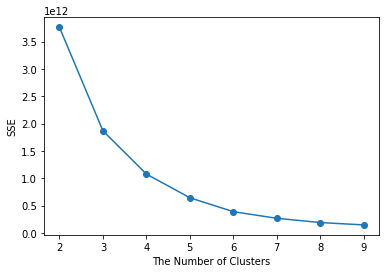

[3761855732580.979, 1869248058711.8257, 1078354786306.3661, 643906057864.9243, 389889833376.42615, 268631283758.69107, 191038008009.59665, 147720046349.82916]


In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import calinski_harabasz_score

df_kmeans = df[['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]

for column in df_kmeans.columns.difference(['Purchase']):
    le = LabelEncoder()
    df_kmeans[column] = le.fit_transform(df_kmeans[column])

def elbow(X):
    sse = []
    
    for i in range(2,10):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(2,10), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(df_kmeans)

k = 4 또는 5일떄 곡선이 완만해 지는 것을 확인함 -> 5로 선택

3. 최적의 군집 개수를 찾아 재수행한 군집분석의 결과로 분류된 군집번호를 원본 데이터인 BlackFriday데이터의 각 행에 맞게 labeling 하여 clust라는 변수로 저장하고, cluster별 특성을 파악하여 설명하시오.

In [14]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(df_kmeans)

new_labels = km.labels_
df['clust'] = new_labels
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_All,clust
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,21.0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,12.0,3
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,26.0,3
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.0,0


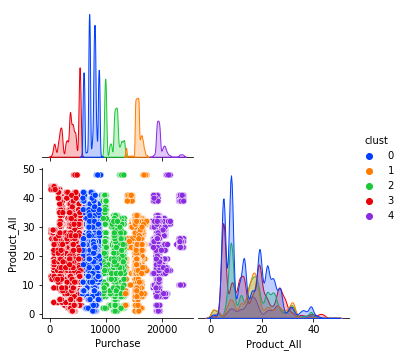

In [15]:
import seaborn as sns

sns.pairplot(df,diag_kind='kde', hue='clust',corner=True,palette='bright')
plt.show()